## API set-up

In [ ]:
pip install meteostat

## Fetch weather stations

In [4]:
import requests

def get_nearest_station(lat, lon):
    url = 'https://meteostat.p.rapidapi.com/stations/nearby'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace with your actual API key
    }
    params = {
        'lat': lat,
        'lon': lon
    }
    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()  # Raise an exception for HTTP errors
        data = response.json()
        return data['data'][0]['id'] if data['data'] else None
    except requests.RequestException as e:
        print("Error fetching data:", e)
        return None

# Example usage
latitude = 38.9445
longitude = -77.4558
station_code = get_nearest_station(latitude, longitude)
print(station_code)  # This will print the nearest weather station code or None if an error occurs

72403


IAD = Point(38.9445, -77.4558, 95) station ID is = 72403;


BWI = Point(39.1774, -76.6684, 146) #station ID is = 72406;


PHL = Point(39.8721, -75.2431, 36) #station ID is = 72408;


EWR = Point(40.6895, -74.1745, 18) #station ID is = 72502;


JFK = Point(40.6413, -73.7781, 13) #station ID is =74486;


LGA = Point(40.7769, -73.874, 21) #station ID is =72503;


BOS = Point(42.3656, 71.0096) #station ID is =72509;


ATL = Point (33.6407, 84.4277) #station ID is =72219.

## Fetch weather data for each weather station

### IAD Washing Dulles International Airport, Washington DC

In [5]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE IAD 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_iad_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_iad_2010_df
#Washing Dulles International Airport, Washington DC.

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-4.5,-14.4,3.3,0.0,51.0,NaN,6.1,None,1026.4,None,72403
1,2010-02-02,-1.6,-9.4,4.4,7.1,25.0,NaN,3.2,None,1021.9,None,72403
2,2010-02-03,1.2,-2.8,4.4,0.5,102.0,NaN,8.3,None,1020.2,None,72403
3,2010-02-04,1.3,-2.8,4.4,0.0,51.0,NaN,7.6,None,1028.7,None,72403
4,2010-02-05,0.1,-1.1,1.7,37.3,25.0,NaN,9.7,None,1021.0,None,72403
5,2010-02-06,-2.9,-12.2,0.0,50.3,457.0,357.0,16.9,None,1005.7,None,72403
6,2010-02-07,-6.1,-13.9,-0.6,0.0,533.0,317.0,12.6,None,1016.5,None,72403
7,2010-02-08,-5.0,-10.6,0.0,0.0,508.0,297.0,11.9,None,1021.0,None,72403
8,2010-02-09,-4.6,-12.2,1.7,7.6,483.0,NaN,3.2,None,1017.3,None,72403
9,2010-02-10,-3.6,-6.7,-1.1,10.7,660.0,321.0,31.0,None,998.5,None,72403


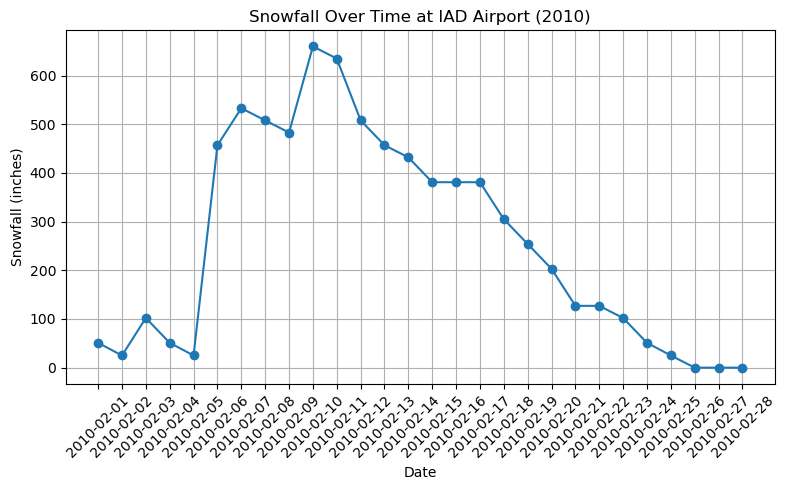

In [6]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(weather_iad_2010_df['date'], weather_iad_2010_df['snow'], marker='o', linestyle='-')
plt.title('Snowfall Over Time at IAD Airport (2010)')
plt.xlabel('Date')
plt.ylabel('Snowfall (inches)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

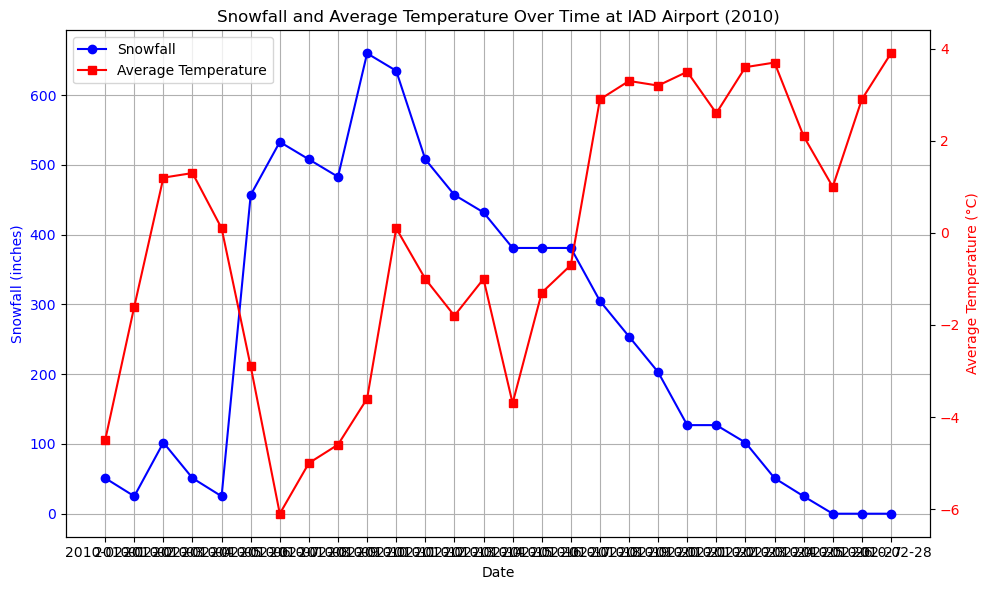

In [7]:
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_iad_2010_df['date'], weather_iad_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Date')
ax1.set_ylabel('Snowfall (inches)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_iad_2010_df['date'], weather_iad_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Title
plt.title('Snowfall and Average Temperature Over Time at IAD Airport (2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


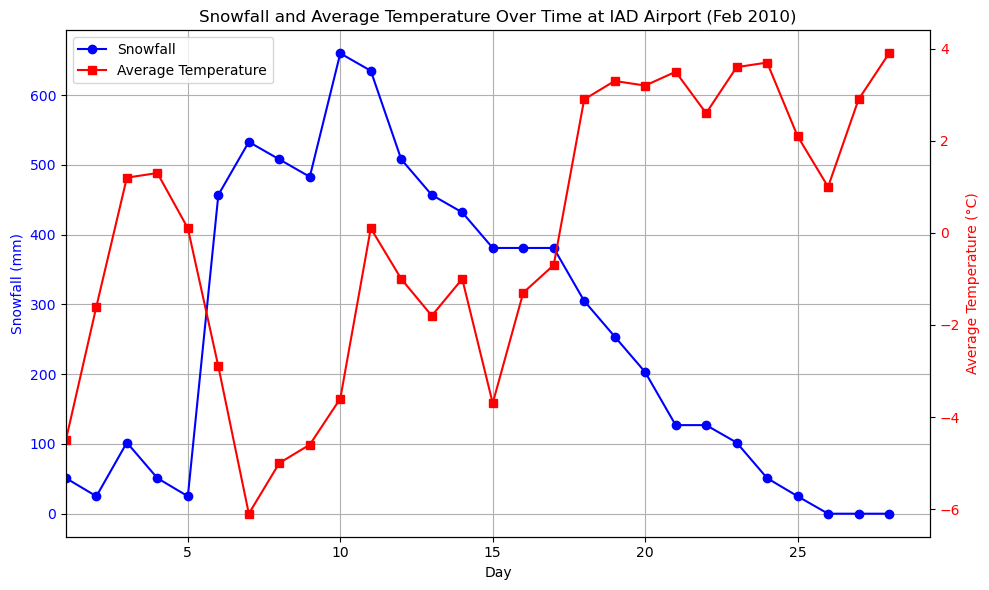

In [8]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_iad_2010_df['date'] = pd.to_datetime(weather_iad_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_iad_2010_df['date'].dt.day, weather_iad_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_iad_2010_df['date'].dt.day, weather_iad_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at IAD Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### BWI Baltimore/Washington International Thurgood Marshall Airport in Maryland

In [9]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE BWI 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_bwi_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_bwi_2010_df
#Baltimore/Washington International Thurgood Marshall Airport in Maryland

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-4.5,-14.4,3.3,0.0,51.0,NaN,6.1,None,1026.4,None,72403
1,2010-02-02,-1.6,-9.4,4.4,7.1,25.0,NaN,3.2,None,1021.9,None,72403
2,2010-02-03,1.2,-2.8,4.4,0.5,102.0,NaN,8.3,None,1020.2,None,72403
3,2010-02-04,1.3,-2.8,4.4,0.0,51.0,NaN,7.6,None,1028.7,None,72403
4,2010-02-05,0.1,-1.1,1.7,37.3,25.0,NaN,9.7,None,1021.0,None,72403
5,2010-02-06,-2.9,-12.2,0.0,50.3,457.0,357.0,16.9,None,1005.7,None,72403
6,2010-02-07,-6.1,-13.9,-0.6,0.0,533.0,317.0,12.6,None,1016.5,None,72403
7,2010-02-08,-5.0,-10.6,0.0,0.0,508.0,297.0,11.9,None,1021.0,None,72403
8,2010-02-09,-4.6,-12.2,1.7,7.6,483.0,NaN,3.2,None,1017.3,None,72403
9,2010-02-10,-3.6,-6.7,-1.1,10.7,660.0,321.0,31.0,None,998.5,None,72403


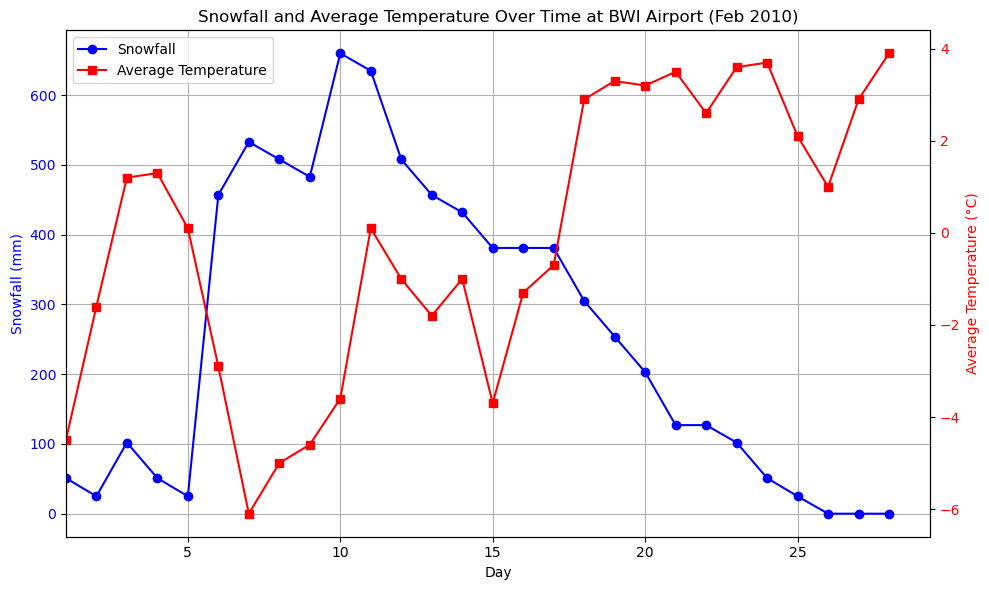

In [10]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_bwi_2010_df['date'] = pd.to_datetime(weather_bwi_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_bwi_2010_df['date'].dt.day, weather_bwi_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_bwi_2010_df['date'].dt.day, weather_bwi_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at BWI Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## PHL Philadelphia

In [11]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE PHL 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72408']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_phl_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_phl_2010_df
#Philadelphia International Airport (PHL) in Pennsylvania

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-1.8,-6.1,2.2,0.0,0.0,270.0,16.2,None,1025.3,None,72408
1,2010-02-02,-0.6,-5.6,2.2,0.0,0.0,NaN,6.1,None,1023.4,None,72408
2,2010-02-03,1.3,-0.6,4.4,0.5,25.0,NaN,10.8,None,NaN,None,72408
3,2010-02-04,1.3,-1.1,4.4,0.0,0.0,295.0,14.4,None,1027.5,None,72408
4,2010-02-05,0.5,-1.7,3.3,14.0,0.0,NaN,7.6,None,1023.1,None,72408
5,2010-02-06,-3.8,-8.3,-1.7,47.0,432.0,23.0,28.4,None,1006.3,None,72408
6,2010-02-07,-5.0,-10.0,0.0,0.0,508.0,314.0,16.6,None,1013.8,None,72408
7,2010-02-08,-3.8,-10.6,1.7,0.0,356.0,273.0,18.4,None,1017.6,None,72408
8,2010-02-09,-1.7,-7.2,2.8,14.0,279.0,NaN,7.9,None,1017.3,None,72408
9,2010-02-10,-0.7,-2.2,0.6,27.9,432.0,4.0,28.4,None,NaN,None,72408


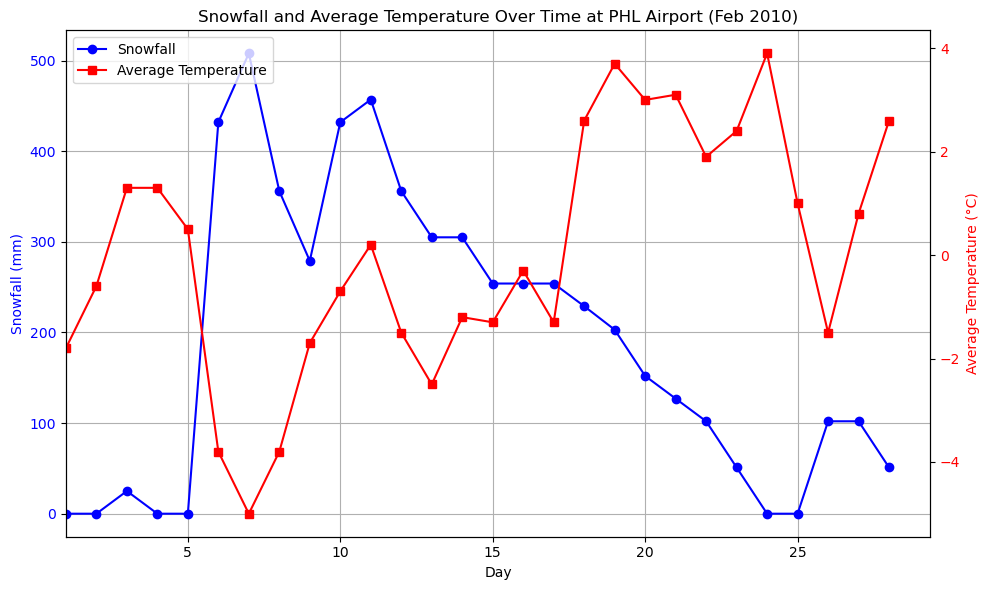

In [12]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_phl_2010_df['date'] = pd.to_datetime(weather_phl_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_phl_2010_df['date'].dt.day, weather_phl_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_phl_2010_df['date'].dt.day, weather_phl_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at PHL Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## EWR Newark Liberty International Airport in New Jersey

In [13]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE EWR 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72502']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_ewr_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_ewr_2010_df
#Newark Liberty International Airport EWR in New Jersey

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-1.4,-6.1,3.3,0.0,0.0,252.0,18.4,None,1023.3,None,72502
1,2010-02-02,-0.9,-4.4,1.1,1.8,0.0,NaN,7.6,None,1023.5,None,72502
2,2010-02-03,0.7,-1.7,5.6,1.8,51.0,331.0,13.3,None,1018.0,None,72502
3,2010-02-04,0.8,-2.2,4.4,0.0,0.0,304.0,19.8,None,1025.9,None,72502
4,2010-02-05,0.8,-2.8,2.8,0.0,0.0,NaN,7.6,None,1023.1,None,72502
5,2010-02-06,-2.8,-6.1,0.6,0.5,0.0,27.0,27.7,None,1008.0,None,72502
6,2010-02-07,-3.7,-8.9,2.8,0.0,0.0,321.0,20.9,None,1011.7,None,72502
7,2010-02-08,-1.0,-6.1,4.4,0.0,0.0,294.0,22.3,None,1014.5,None,72502
8,2010-02-09,1.3,-4.4,6.7,0.3,0.0,256.0,11.2,None,1015.7,None,72502
9,2010-02-10,0.2,-0.6,1.7,33.0,76.0,17.0,24.8,None,NaN,None,72502


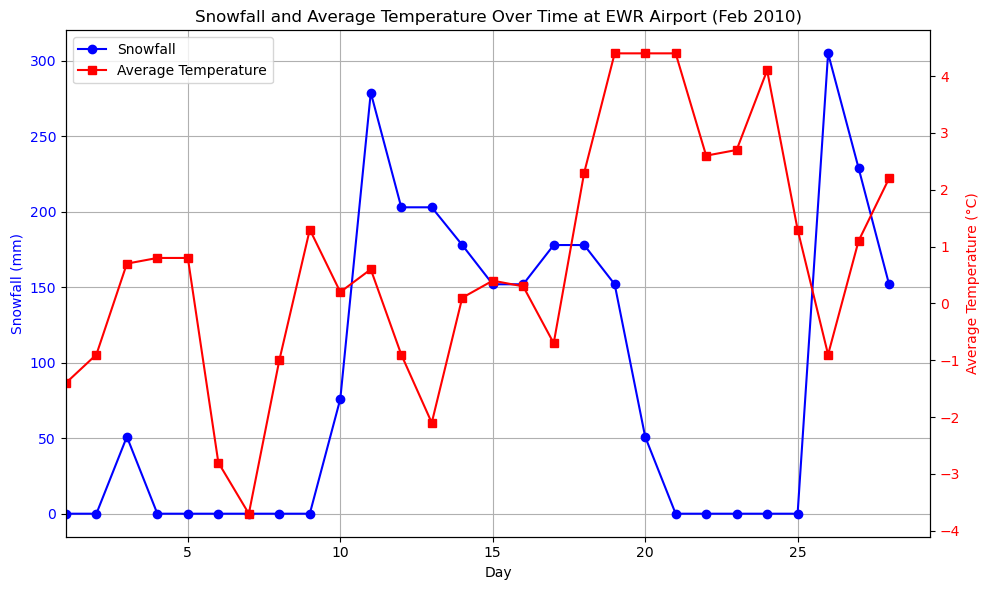

In [14]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_ewr_2010_df['date'] = pd.to_datetime(weather_ewr_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_ewr_2010_df['date'].dt.day, weather_ewr_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_ewr_2010_df['date'].dt.day, weather_ewr_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at EWR Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## JFK Airport in New York

In [15]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE JFK 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['74486']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_jfk_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_jfk_2010_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-0.9,-3.9,2.8,0.0,0.0,270.0,22.3,None,1023.4,None,74486
1,2010-02-02,-1.0,-3.9,0.6,0.0,0.0,46.0,10.1,None,1023.8,None,74486
2,2010-02-03,0.3,-2.2,4.4,0.8,25.0,343.0,15.8,None,1018.1,None,74486
3,2010-02-04,0.8,-1.7,3.3,0.0,0.0,317.0,22.3,None,1025.8,None,74486
4,2010-02-05,0.6,-1.7,2.8,0.0,0.0,335.0,11.5,None,1023.3,None,74486
5,2010-02-06,-3.1,-6.1,0.6,2.8,0.0,36.0,33.1,None,1008.1,None,74486
6,2010-02-07,-4.2,-8.9,1.7,0.0,25.0,330.0,28.1,None,1011.3,None,74486
7,2010-02-08,-1.2,-5.0,3.9,0.0,0.0,305.0,27.7,None,1014.3,None,74486
8,2010-02-09,0.8,-2.2,4.4,0.5,0.0,263.0,15.1,None,1015.9,None,74486
9,2010-02-10,-0.2,-1.1,0.6,31.5,51.0,30.0,31.3,None,992.7,None,74486


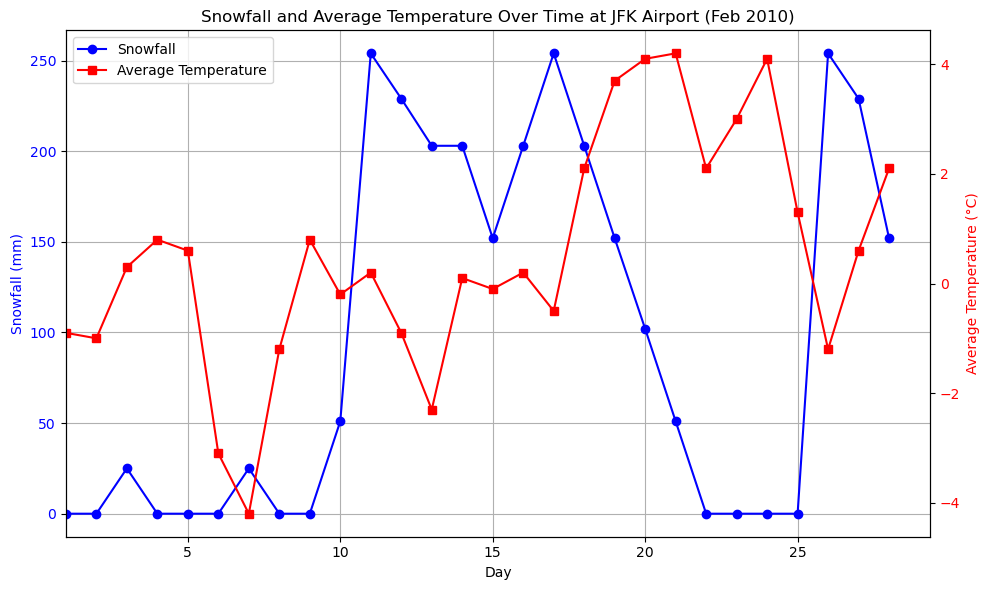

In [16]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_jfk_2010_df['date'] = pd.to_datetime(weather_jfk_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_jfk_2010_df['date'].dt.day, weather_jfk_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_jfk_2010_df['date'].dt.day, weather_jfk_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at JFK Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## LGA LaGuardia Airport in NYC

In [28]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE LGA 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72503']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_lga_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_lga_2010_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-0.5,-2.8,2.2,0.0,0.0,265.0,22.3,None,1023.0,None,72503
1,2010-02-02,-0.3,-1.7,1.1,0.3,0.0,NaN,10.8,None,1023.4,None,72503
2,2010-02-03,0.4,-2.2,3.3,2.0,25.0,351.0,16.9,None,1017.8,None,72503
3,2010-02-04,0.8,-1.7,3.3,0.0,0.0,312.0,22.3,None,1025.5,None,72503
4,2010-02-05,1.0,-0.6,2.8,0.0,0.0,327.0,11.2,None,1023.0,None,72503
5,2010-02-06,-2.3,-5.6,0.6,0.0,0.0,33.0,32.0,None,1008.2,None,72503
6,2010-02-07,-3.8,-7.8,1.7,0.0,0.0,325.0,28.1,None,1011.2,None,72503
7,2010-02-08,-1.0,-4.4,3.3,0.0,0.0,303.0,25.6,None,1014.0,None,72503
8,2010-02-09,1.8,-1.1,5.6,0.0,0.0,279.0,13.7,None,1015.4,None,72503
9,2010-02-10,0.0,-1.1,1.1,26.4,25.0,34.0,30.2,None,993.2,None,72503


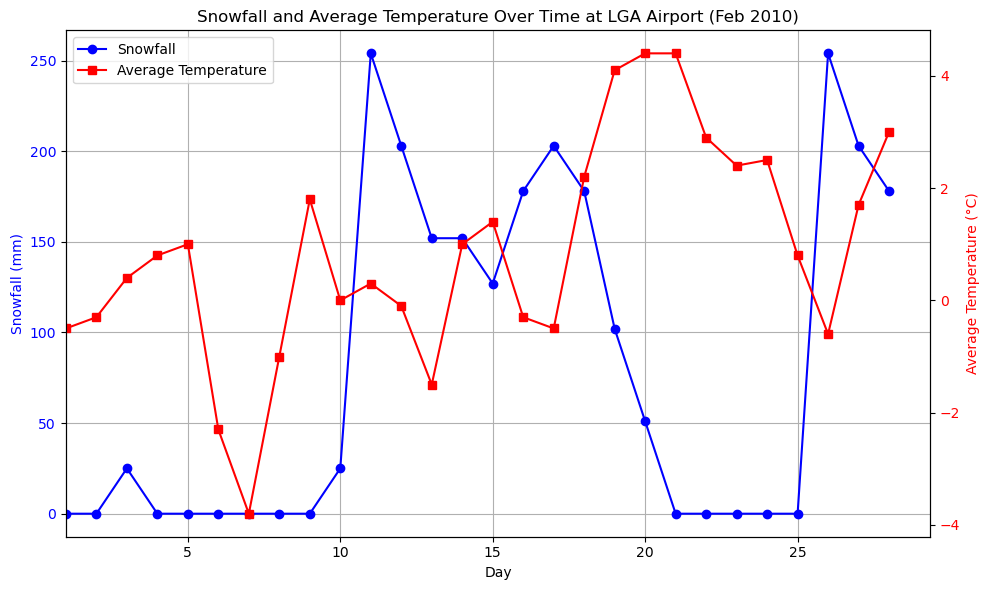

In [18]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_lga_2010_df['date'] = pd.to_datetime(weather_lga_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_lga_2010_df['date'].dt.day, weather_lga_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_lga_2010_df['date'].dt.day, weather_lga_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at LGA Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Stacking DFs: DFs joined

In [ ]:
weather_jfk_2010_df

In [ ]:
weather_iad_2010_df

In [ ]:
weather_bwi_2010_df

In [ ]:
weather_phl_2010_df

In [ ]:
weather_ewr_2010_df

In [ ]:
weather_lga_2010_df

## Merging each airport DF into one

Merging each airport dataframe into one combined one

In [63]:
import pandas as pd

# Assuming you have the following DataFrames:
# weather_jfk_2010_df
# weather_iad_2010_df
# weather_bwi_2010_df
# weather_phl_2010_df
# weather_ewr_2010_df

# List of DataFrames
#dfs = [weather_jfk_2010_df, weather_iad_2010_df, weather_bwi_2010_df, weather_phl_2010_df, weather_ewr_2010_df, weather_lga_2010_df]

# Concatenate the DataFrames vertically
weather_stacked_V2_df = pd.concat([weather_jfk_2010_df, weather_iad_2010_df, weather_bwi_2010_df, weather_phl_2010_df, weather_ewr_2010_df, weather_lga_2010_df], ignore_index=True)

# Print the stacked DataFrame
weather_stacked_V2_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-0.9,-3.9,2.8,0.0,0.0,270.0,22.3,None,1023.4,None,74486
1,2010-02-02,-1.0,-3.9,0.6,0.0,0.0,46.0,10.1,None,1023.8,None,74486
2,2010-02-03,0.3,-2.2,4.4,0.8,25.0,343.0,15.8,None,1018.1,None,74486
3,2010-02-04,0.8,-1.7,3.3,0.0,0.0,317.0,22.3,None,1025.8,None,74486
4,2010-02-05,0.6,-1.7,2.8,0.0,0.0,335.0,11.5,None,1023.3,None,74486
...,...,...,...,...,...,...,...,...,...,...,...,...
163,2010-02-24,2.5,1.7,3.9,6.1,0.0,355.0,20.2,None,1006.4,None,72503
164,2010-02-25,0.8,-1.7,1.7,37.8,0.0,338.0,18.4,None,995.2,None,72503
165,2010-02-26,-0.6,-2.8,1.7,18.0,254.0,306.0,22.3,None,987.2,None,72503
166,2010-02-27,1.7,-1.1,3.9,0.0,203.0,228.0,13.0,None,999.2,None,72503


Inserting airport codes as primary keys to be matched:

In [64]:
# Dictionary mapping station IDs to FAA codes
station_to_faa = {
    '72403': 'IAD',
    '72406': 'BWI',
    '72408': 'PHL',
    '72502': 'EWR',
    '74486': 'JFK',
    '72503': 'LGA'
}

# Add a new column 'faa' based on the mapping
weather_stacked_V2_df['faa'] = weather_stacked_V2_df['station_id'].map(station_to_faa)

# Print the DataFrame with the new column
weather_stacked_V2_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id,faa
0,2010-02-01,-0.9,-3.9,2.8,0.0,0.0,270.0,22.3,None,1023.4,None,74486,JFK
1,2010-02-02,-1.0,-3.9,0.6,0.0,0.0,46.0,10.1,None,1023.8,None,74486,JFK
2,2010-02-03,0.3,-2.2,4.4,0.8,25.0,343.0,15.8,None,1018.1,None,74486,JFK
3,2010-02-04,0.8,-1.7,3.3,0.0,0.0,317.0,22.3,None,1025.8,None,74486,JFK
4,2010-02-05,0.6,-1.7,2.8,0.0,0.0,335.0,11.5,None,1023.3,None,74486,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2010-02-24,2.5,1.7,3.9,6.1,0.0,355.0,20.2,None,1006.4,None,72503,LGA
164,2010-02-25,0.8,-1.7,1.7,37.8,0.0,338.0,18.4,None,995.2,None,72503,LGA
165,2010-02-26,-0.6,-2.8,1.7,18.0,254.0,306.0,22.3,None,987.2,None,72503,LGA
166,2010-02-27,1.7,-1.1,3.9,0.0,203.0,228.0,13.0,None,999.2,None,72503,LGA


## Exporting dataframe into database 

In [65]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'snowmageddon'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        weather_stacked_V2_df.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The snowmageddon table was imported successfully.


Follow this for API key: 
https://rapidapi.com/developer/authorization/default-application_9067818

Different way to get to weather stations:

In [ ]:
# Import Meteostat library
from meteostat import Stations

# Example usage
latitude = 40.7769
longitude = -73.874

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(latitude, longitude)
station = stations.fetch(1)

# Print DataFrame
print(station)

                            name country region   wmo  icao  latitude  \
id                                                                      
KNYC0  New York City / Yorkville      US     NY  <NA>  KNYC   40.7789   

       longitude  elevation          timezone hourly_start hourly_end  \
id                                                                      
KNYC0   -73.9692        3.0  America/New_York   1943-12-01 2024-05-07   

      daily_start  daily_end monthly_start monthly_end     distance  
id                                                                   
KNYC0  1943-12-02 2022-04-24    1944-01-01  2021-01-01  8019.117024  
